## **DIP Assignment 1**

---

In [ ]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import os
import math

### **1. A green screen is used because it doesn't match any natural skin tone or hair color, meaning no part of an actor will be edited out through chroma key.**

**1.1.a**
---
**Reading Images**

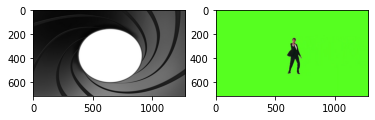

In [ ]:
# Reading images
bgimg = cv2.cvtColor(cv2.imread('./../images/bg.jpg'), cv2.COLOR_BGR2RGB)
fgimg = cv2.cvtColor(cv2.imread('./../images/fg.jpg'), cv2.COLOR_BGR2RGB)

# Plotting
f, axarr = plt.subplots(1,2)
axarr[0].imshow(bgimg)
axarr[1].imshow(fgimg)

**Converting all unwanted green pixels to black. i.e. [0, 0, 0]**

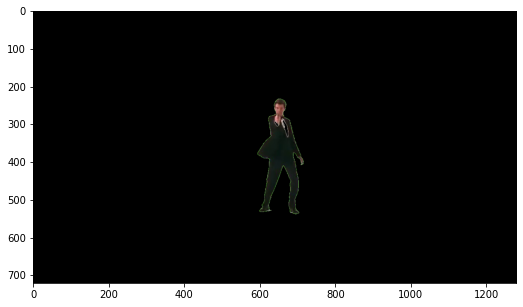

In [ ]:
# Setting desired pixel range
lower_limit = np.array([0, 0 ,0])
upper_limit = np.array([255, 200 ,255])

# Checks if the input pixel is in range and returns the same pixel else return black pixel (0, 0, 0)
def check(arr):
  for k in range(len(arr)):
    if not (arr[k] >= lower_limit[k] and arr[k] <= upper_limit[k]):
      return np.array([0, 0, 0]);
  return arr

# Apply the check() function on all pixels i.e. axis 2
fgimg = np.apply_along_axis(check, 2, fgimg)
plt.figure(figsize=(10, 5))
plt.imshow(fgimg)

**Merging background with foreground. Copying non black pixels from fg to bg**

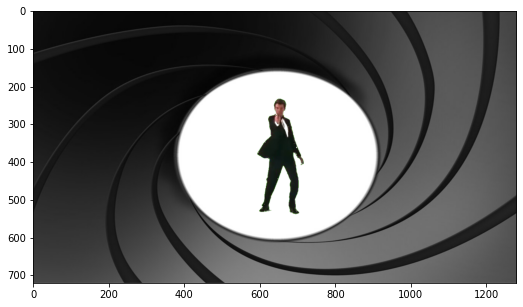

In [ ]:
# Copy non black pixel from fg to bg
newimg = bgimg
for i in range(len(newimg)):
  for j in range(len(newimg[i])):
    if fgimg[i][j].all() != 0:
      newimg[i][j] = fgimg[i][j]
plt.figure(figsize=(10, 5))
plt.imshow(newimg)

### **1.1.b**
---
**Loading mansion image**

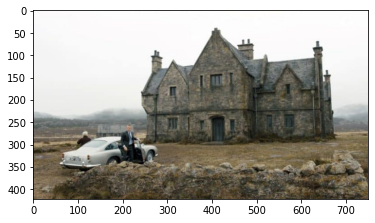

In [ ]:
bgimg = cv2.cvtColor(cv2.imread('./../images/mansion.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(bgimg)

**Overwriting pixels to get final output**

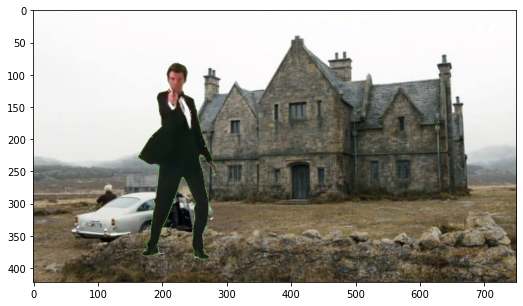

In [ ]:
newimg = bgimg
newfgimg = fgimg

# Making dimensions of both fg and bg equal
xoffset = 150
yoffset = 430
newfgimg = fgimg[xoffset:newimg.shape[0] + xoffset,yoffset:newimg.shape[1] + yoffset,:]

# Overwriting pixels where 007 is present
for i in range(len(newfgimg)):
  for j in range(len(newfgimg[i])):
    if newfgimg[i][j].all() != 0:
      newimg[i][j] = newfgimg[i][j]

plt.figure(figsize=(10, 5))
plt.imshow(newimg)

### **1.1.c**
---
**Loading images**

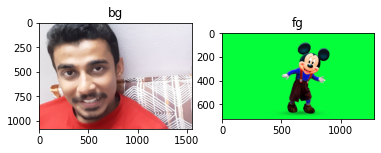

In [ ]:
bgimg = cv2.cvtColor(cv2.imread('./../images/me.jpg'), cv2.COLOR_BGR2RGB)
fgimg = cv2.cvtColor(cv2.imread('./../images/mickey.jpg'), cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(bgimg)
axarr[0].title.set_text('bg')
axarr[1].imshow(fgimg)
axarr[1].title.set_text('fg')

**Overwriting pixels from fg to bg where there is no green**

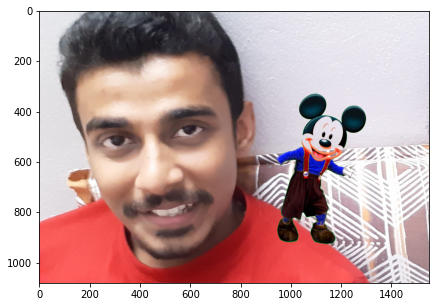

In [ ]:
# The fg image is in the center, so to move it to the bottom right we include an offset
xoffset = 250
yoffset = 400

# Copying non green pixels
for i in range(len(fgimg)):
  for j in range(len(fgimg[i])):
    if fgimg[i][j][1] < 160:
      bgimg[i + xoffset][j + yoffset] = fgimg[i][j]

# Plotting result
plt.figure(figsize=(10, 5))
plt.imshow(bgimg)

### **1.2**
1GB = $2^{30}$ Bytes

So, 4GB = 4 x $2^{30}$ Bytes

Each pixel has 3 channels of R, G, B of 1 byte each.
So Bytes occupied by one image = 1280 x 720 x 3 = 2764800

Total number of images = $2^{30}$ / 2764800 = 1553.4459 = 1553

In [ ]:
# Code to produce answer
ans = (4 * pow(2, 30)) / (1280 * 720 * 3)
print(ans)
print("Number of images that can be stored = " + str(int(ans)))

1553.4459259259258
Number of images that can be stored = 1553


### **2**

Size of image = 168.75 MB

So, number of Bytes occupied by image = 168.75 * $2^{30}$ Bytes = 181193932800 Bytes

Bytes occupied by a colour image of size $n^{2}$ (square image) = $n^{2}$ * 3 Bytes (3 because a colour image has 3 channels)

$n^{2} * 3 = 176947200$

$n^{2} = 176947200 / 3 = 58982400$

$∴ n = \sqrt[2]{58982400} = 7680$

In [ ]:
#Calculations

import math

Bytes_occupied_by_image = 168.75 * pow(2, 20)
print("Bytes_occupied_by_image = " + str(Bytes_occupied_by_image))

n = math.sqrt(Bytes_occupied_by_image / 3)
print("n = " + str(n))

Bytes_occupied_by_image = 176947200.0
n = 7680.0


### **3**
Dimensions of CCD = 1024 x 1024 pixels

Total size of CCD = 1cm x 1cm

1 pixel = square of side $h$

$∴$ $h^{2}$ x 1024 x 1024 = 1cm x 1cm

$⇒h$ = $\sqrt[2]{(1cm * 1cm) / (1024 * 1024)}$

$⇒h = (1 / 1024) cm$

Magnification of lens $m = v/u = I/O$

Since the image is formed at focus of camera lens:

$v = f = 62.5 mm = 6.25 cm$

Object Height = $O = 32.8 cm$

$I = (v * O) / u$

In question it is given that $I >= 50pixels = 50 * (1/1024) cm$

$⇒I >= 0.048828125$

$⇒(v * O) / u >= 0.048828125$

$⇒(6.25 * 32.8) / 0.048828125 >= u$

$⇒u >= 4198.4 cm$

$∴$ Farthest Distance $= 4198.4 cm = 41.9 m$

### **4.1**

Reading image

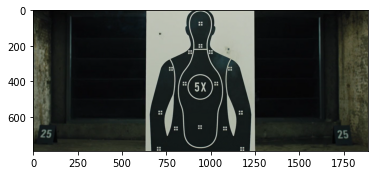

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/007_test1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# First scaling the pixel values to be in the range [0, 1] and then multiplying by 2^k - 1 and then rounding to nearest integer
def bitQuantizeImage(im, k):
  return np.rint((im / 255) * (pow(2, k) - 1)).astype('int')

### **4.2**

In [ ]:
# Storing the results in images array
images = []
for k in range(1, 9, 1):
  images.append(bitQuantizeImage(img, k))

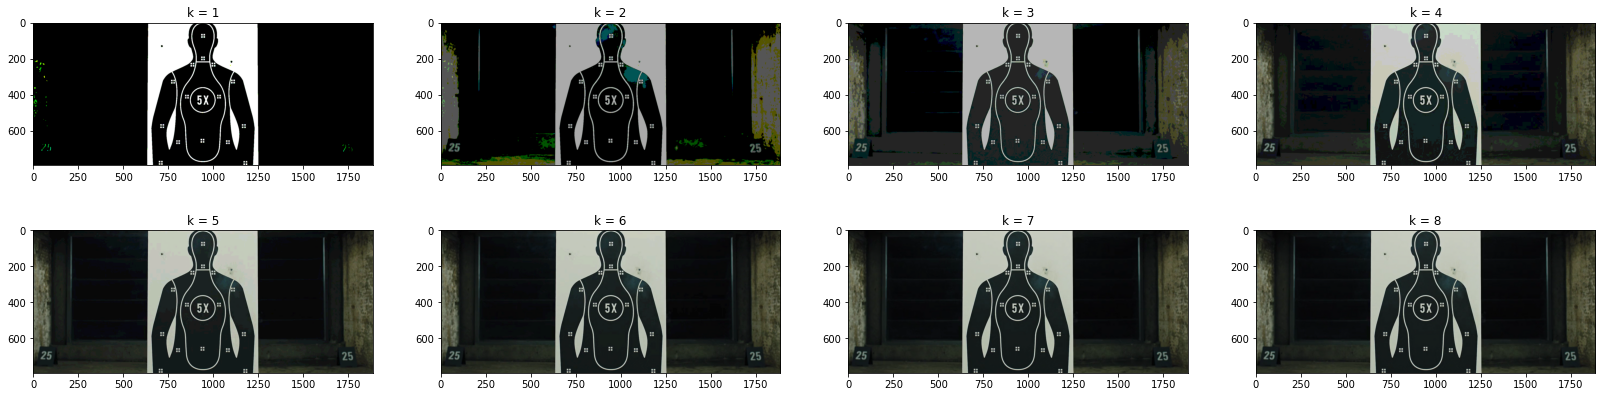

In [ ]:
# Plotting all results
f, axarr = plt.subplots(2,4,figsize=(28,7))
for i in range(2):
  for j in range(4):
    # Here normalize function is used to convert k bit image to 8 bit image for plotting correctly
    axarr[i][j].imshow(cv2.normalize(images[i * 4 + j], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))
    axarr[i][j].title.set_text("k = " + str(i*4 + j + 1))
plt.show()

### **4.3**

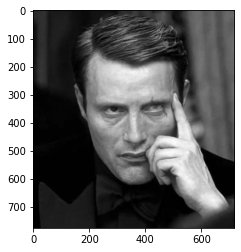

In [ ]:
# Reading image as RGB
img = cv2.cvtColor(cv2.imread('./../images/007_test2.png'), cv2.COLOR_BGR2RGB)
# Converting to grayscale by taking average of 3 channels
img = (img.sum(axis=2) / 3).astype('int')
# Plotting
plt.imshow(img, cmap='gray')

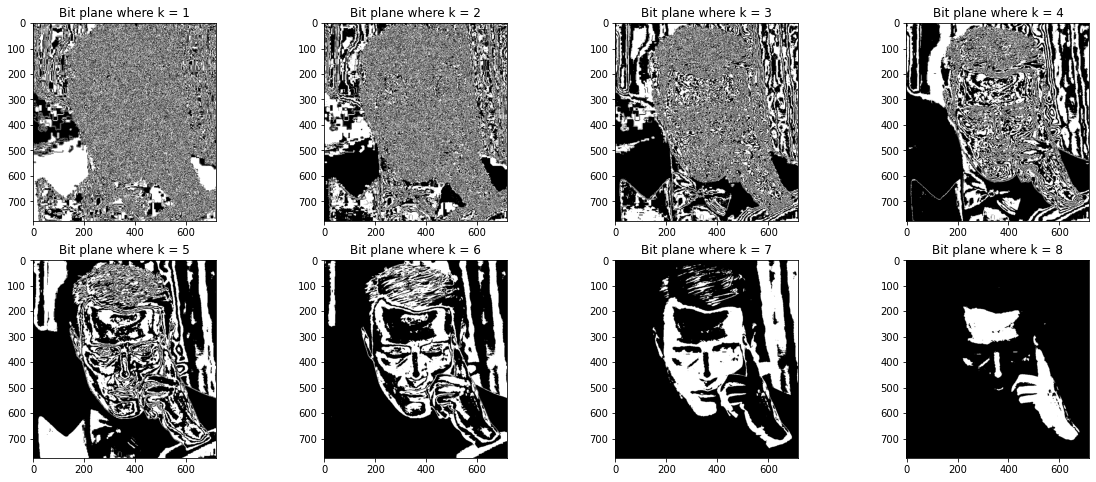

In [ ]:
# First converted all bits except kth bit to 0 using masking im & (1 << k) and then normalized to 8bits
def getBitPlaneIMG(im, k):
  return cv2.normalize(((im & (1 << k)) / (1 << k)).astype('int'), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

f, axarr = plt.subplots(2,4,figsize=(20,8))
for i in range(2):
  for j in range(4):
    axarr[i][j].imshow(getBitPlaneIMG(img, i * 4 + j), cmap='gray')
    axarr[i][j].title.set_text("Bit plane where k = " + str(i * 4 + j + 1))
plt.show()

### **4.4**

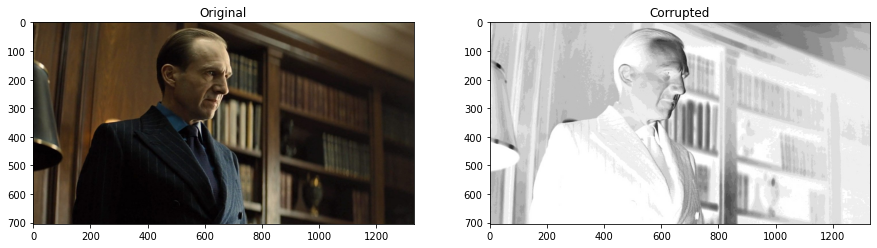

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/mallory.jpg'), cv2.COLOR_BGR2RGB)
origimg = cv2.cvtColor(cv2.imread('./../images/mallory_corrupt.jpg'), cv2.COLOR_BGR2RGB)

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(img)
axarr[0].title.set_text("Original")
axarr[1].imshow(origimg)
axarr[1].title.set_text("Corrupted")
plt.show()

**The corrupt image can be obtained by converting it to a grayscale image first then quantizing it to a 4 bit image and then linearly inverting it.**

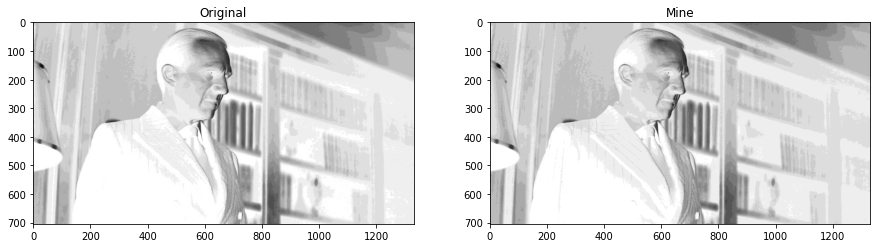

In [ ]:
# Converting to grayscale i.e. Taking average of 3 channels
newimg = (img.sum(axis=2) / 3).astype('int')
# Quantizing image to 4 bit
k = 4
newimg = bitQuantizeImage(newimg, k)
# Inverting the image
newimg = (pow(2, k) - 1 - newimg)

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[1].imshow(cv2.normalize(newimg, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX), cmap='gray')
axarr[1].title.set_text('Mine')
axarr[0].imshow(origimg)
axarr[0].title.set_text('Original')
plt.show()

### **5.1**

In [ ]:
# def linContrastStretching(im, a, b):
#   return (a + ((im - np.min(im)) / (np.max(im) - np.min(im))) * (b - a)).astype('int')

# Linearly stretch contrast range to [a, b]
def linContrastStretching(im, a, b, low=0.05, high=0.95, a_min=None, a_max=None):
    imcopy = im.flat.copy()
    size_of_imcopy = len(imcopy)
    H = np.bincount(imcopy, minlength=256)
    
    # a_min = minimum intensity threshold
    if a_min == None:
        # set a_min to value with less than low percentile intensities
        a_min = min(imcopy[H[imcopy] >= size_of_imcopy*low], default=min(imcopy))
    # a_max = the maximum intensity threshold of given image
    if a_max == None:
        # set a_max to value with more than high percentile intensities
        a_max = max(imcopy[H[imcopy] <= size_of_imcopy*(high)], default=max(imcopy))

    new_img = np.zeros(im.shape)
    # map intensity range [a_min, a_max] to [a, b]
    new_img = new_img + np.rint(a + (im - a_min)*((b-a)/(a_max - a_min)))
    # set intensities <= a_min to a
    new_img = np.where(im <= a_min, a, new_img)
    # set intensities >= a_max to b
    new_img = np.where(im >= a_max, b, new_img)                                          
    return new_img.astype('uint8')

### **5.2**

**Contrast stretching the image to the range [0, 255] with a_max = 30 gives a better image.**

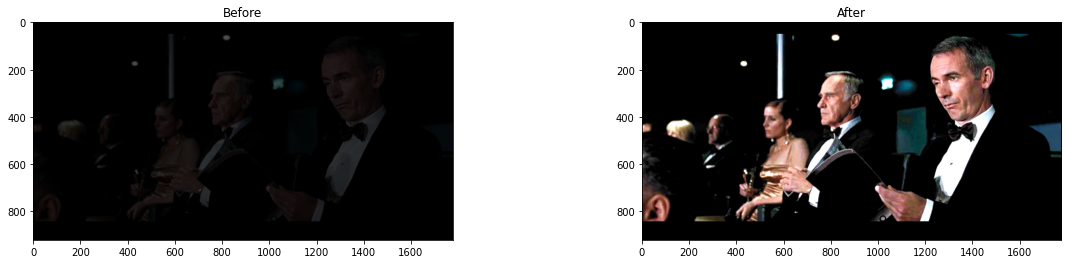

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/quantum_bad.jpg'), cv2.COLOR_BGR2RGB)
# Contrast stretching the image to be in the range [0, 255] and a_max = 30
newimg = linContrastStretching(img, 0, 255, a_max=30)

f, axarr = plt.subplots(1,2,figsize=(20,4))
axarr[0].imshow(img)
axarr[0].title.set_text('Before')
axarr[1].imshow(newimg)
axarr[1].title.set_text('After')

## Explaination

The intensity values are concentrated in a small range in the case of low contrast images. This causes different elements of the image indistuinguishable from each other. To fix this, the technique of Contrast stretching is applied.  
The main concept behind Constrast Streching is that the intensities from the small range of a low contrast image are mapped to a wider range usually $[0,\ 255]$

> $Img_{new} = round(a + (Img_{old} - Img_{min})(\frac{b-a}{Img_{max} - Img_{min}}))$

> $[Img_{min},\ Img_{max}]$ is the intensity range of the given image.

> $[a,\ b]$ is the stretched intensity range. 

The finding of maximum and minimum intensity of the image is usually done by the percentile method which helps to contain the negative effect of just a few high/low value intensities.

### **6.1**

**Helper function to get histogram of image.**

In [ ]:
def getHist(im):
  # Make histogram by find the count for each pixel intensity
  histogramArr = np.array([ 0 for i in range(256) ])
  for i in im.flatten():
    histogramArr[i] += 1
  return histogramArr

In [ ]:
# Applies histogram equalization on image 'im'
def histEqualization(im):
  # getting the histogram
  histogramArr = getHist(im)

  # Find cumulative sum
  for i in range(255):
    histogramArr[i + 1] += histogramArr[i]

  # Normalizing to make the value to be in the range [0, 255]
  arr2 = (histogramArr - histogramArr.min()) * 255    # subtract minimum value from all to make it start from 0
  N = histogramArr.max() - histogramArr.min()         # Number to divide with to make the values in arr2 be in the range [0, 255]
  histogramArr = (arr2 / N).astype('uint8')           # Dividing by N

  # Map pixels to new histogram. For a pixel with value x, it's new value becomes the value in the histogram. i.e. histogramArr[x]
  for row in range(im.shape[0]):
    for col in range(im.shape[1]):
      im[row][col] = histogramArr[im[row][col]]

  return im

### **6.2**

In [ ]:
def histMatching(ipimg, refimg):
  # getting the histogram
  histogramArr1 = getHist(ipimg)

  # Find cumulative sum
  for i in range(255):
    histogramArr1[i + 1] += histogramArr1[i]

  # Normalize
  arr2 = (histogramArr1 - histogramArr1.min()) * 255
  N = histogramArr1.max() - histogramArr1.min()
  histogramArr1 = (arr2 / N).astype('uint8')

  # getting the histogram
  histogramArr2 = getHist(refimg)

  # Find cumulative sum
  for i in range(255):
    histogramArr2[i + 1] += histogramArr2[i]

  # Normalize
  arr2 = (histogramArr2 - histogramArr2.min()) * 255
  N = histogramArr2.max() - histogramArr2.min()
  histogramArr2 = (arr2 / N).astype('uint8')

  # Map to new pixel values. for each pixel x we map it to the pixel value y such
  # the value for pixel x in input image histogram is closest to the value of
  # pixel y in the reference image histogram.
  mapping = np.array([ np.abs(histogramArr2 - histogramArr1[i]).argmin() for i in range(256) ])
  for row in range(ipimg.shape[0]):
    for col in range(ipimg.shape[1]):
      ipimg[row][col] = mapping[ipimg[row][col]]

  return ipimg

### **6.3**

> $ s_k=LT(r_k) = round[(L-1)\sum_{j=0}^{j=k}p_r(r_j)] $

$ p_r(r_j) $ is probability of intensity r

T(r) = Intensity  distribution of source image

Intensity distribution of target image is G(z)

We want intensity distribution (histogram) of original image to match with target image

$ s_k=G(z) $

$ z = G^{-1}(s)=G^{-1}(LT(r)) $

> $M(G_{1}) = \underset{G_{2} \in [0,255]}{\textrm{arg min}} \left\lvert F_{1}(G_{1}) - F_{2}(G_{2}) \right\rvert  \forall G_{1}\in [0,255]$

### **6.4**

**Histogram Equalisation on pratice_range1.jpg**

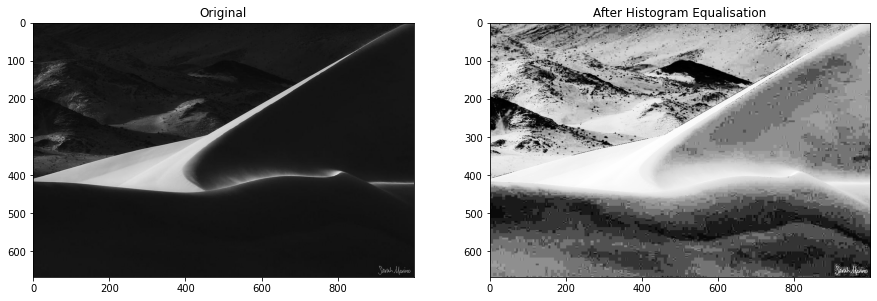

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/practice_range1.jpg'), cv2.COLOR_BGR2RGB)
# Converting to grayscale
img = (img.sum(axis=2) / 3).astype('int')

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(histEqualization(img), cmap='gray')
axarr[1].title.set_text('After Histogram Equalisation')
plt.show()

**Histogram Equalisation on hist.jpg**

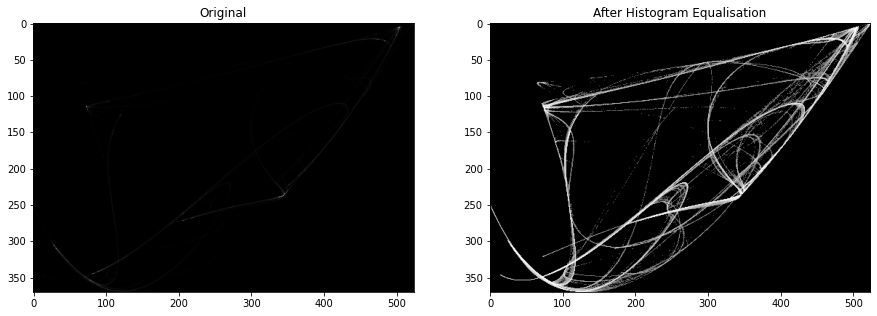

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/hist.png'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(histEqualization(img), cmap='gray')
axarr[1].title.set_text('After Histogram Equalisation')
plt.show()

**Histogram matching on Map.jpg, satellite img.jpg**

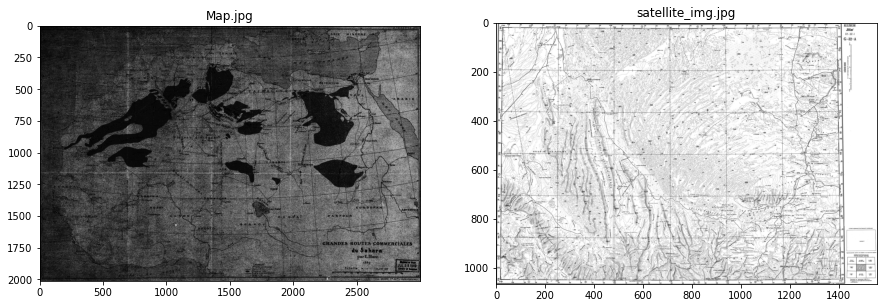

In [ ]:
# Loading Map.jpg
mapimg = cv2.cvtColor(cv2.imread('./../images/Map.jpg'), cv2.COLOR_BGR2RGB)
mapimg = (mapimg.sum(axis=2) / 3).astype('int')

# Loading satellite_img.jpg
satelimg = cv2.cvtColor(cv2.imread('./../images/satellite_img.jpg'), cv2.COLOR_BGR2RGB)
satelimg = (satelimg.sum(axis=2) / 3).astype('int')

# Plotting
f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(mapimg, cmap='gray')
axarr[0].title.set_text('Map.jpg')
axarr[1].imshow(satelimg, cmap='gray')
axarr[1].title.set_text('satellite_img.jpg')
plt.show()

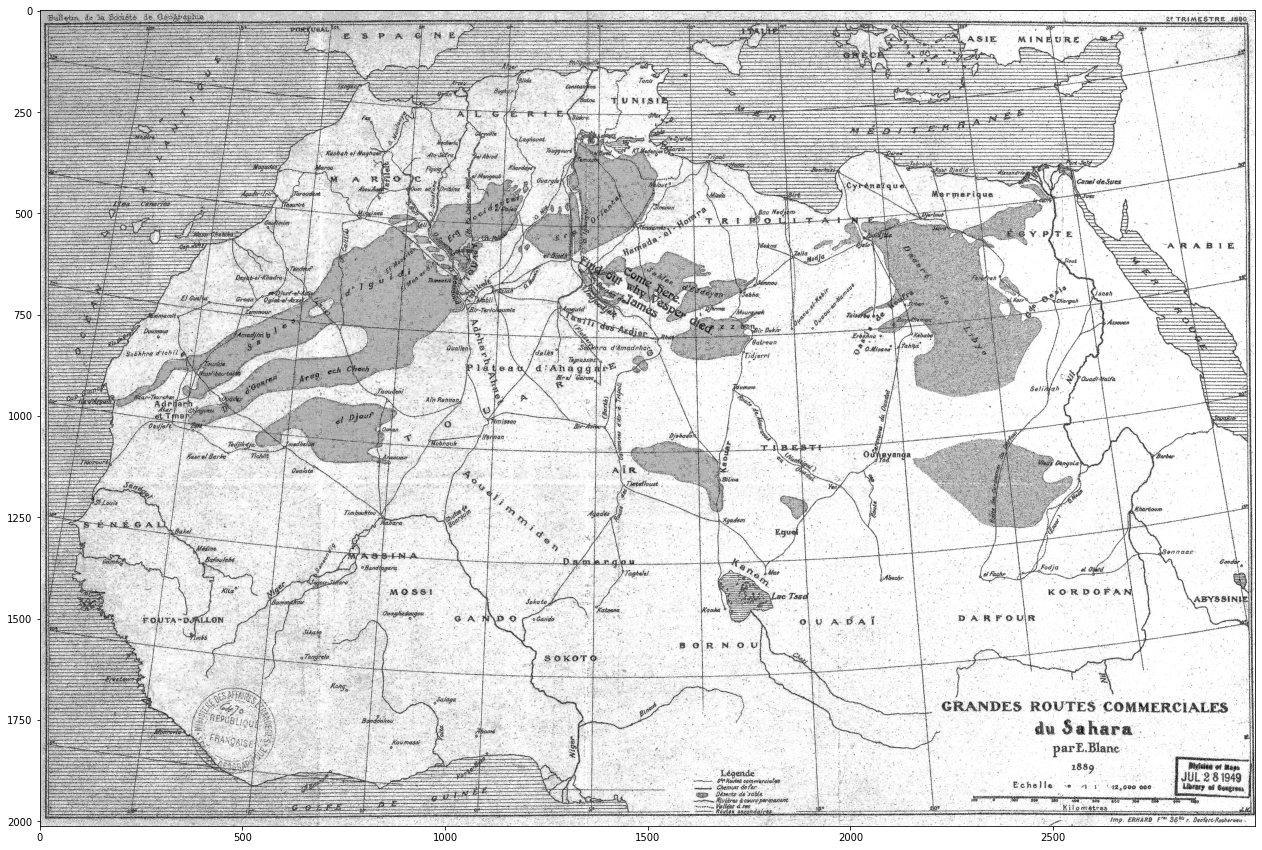

In [ ]:
plt.figure(figsize=(25, 15))
plt.imshow(histMatching(mapimg, satelimg), cmap='gray')

**The person who died is Vesper ( Written on the center of the map )**

### **7.1**

In [ ]:
# coeffsList is a list of (K1, K2, a, b)
def piecewiseLinTransform(im, coeffsList):
  shape_of_image = im.shape
  # Flatten the image to 1D
  im = im.flatten()
  # Go through each pixel
  for pixel in range(len(im)):
    for tr in coeffsList:
      # Go through all given ranges
      if im[pixel] >= tr[2] * 255 and im[pixel] <= tr[3] * 255:
        # Apply the linear function if it's in the range
        im[pixel] = (tr[0] * (im[pixel] / 255) + tr[1]) * 255
        break
  return np.rint(im.reshape(shape_of_image)).astype('uint8')

### **7.2**

In [ ]:
# Helper function to plot the piecewise linear tranfomation used
def plotPLT(axis, arr):
  # Sort w.r.t range
  arr.sort(key=lambda x : x[2:4:])
  x1 = []
  y1 = []
  x1.append(0)
  y1.append(0)
  for i in arr:
    x1.append(i[2])
    x1.append(i[3])
    y1.append(i[2] * i[0] + i[1])
    y1.append(i[3] * i[0] + i[1])
  axis.plot(x1, y1)

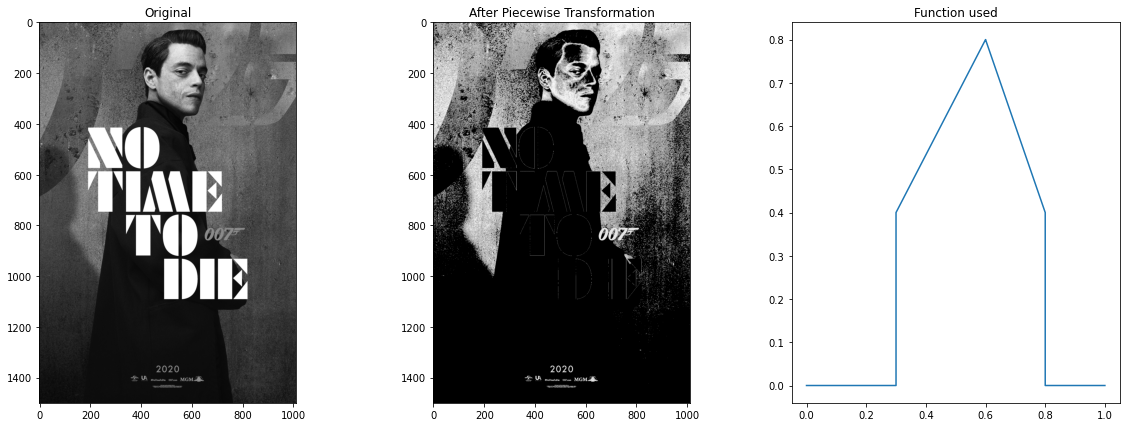

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/bondvillain1.jpg'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

# These are the values extracted from the function to be applied image
transformation = [[4 / 3, 0, 0.3, 0.6], [-2, 2, 0.6, 0.8], [0, 0, 0, 0.3], [0, 0, 0.8, 1]]

f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(piecewiseLinTransform(img, transformation), cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

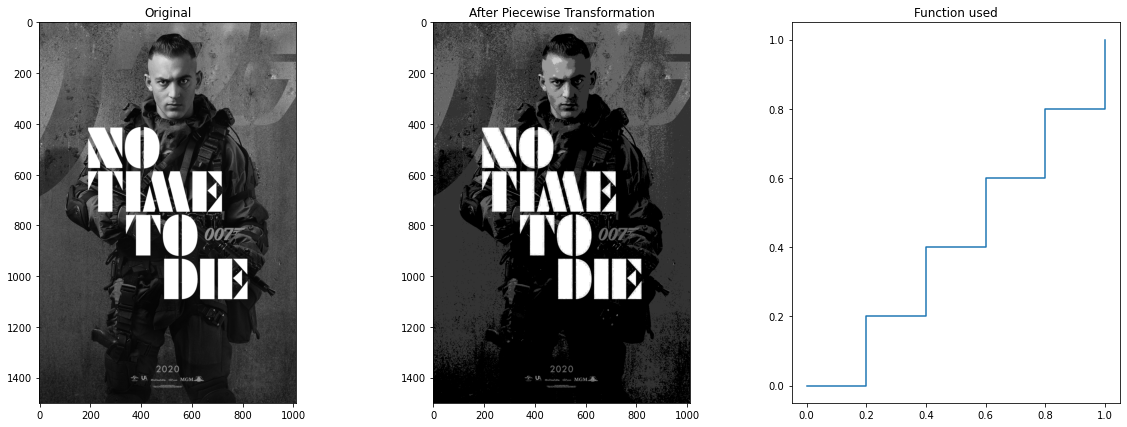

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/bondvillain2.jpg'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

# These are the values extracted from the function to be applied image
transformation = [[0, 1, 1, 1], [0, 0.8, 0.8, 1], [0, 0.6, 0.6, 0.8], [0, 0.4, 0.4, 0.6], [0, 0.2, 0.2, 0.4], [0, 0, 0, 0.2 ]]

f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(piecewiseLinTransform(img, transformation), cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

### **7.3**

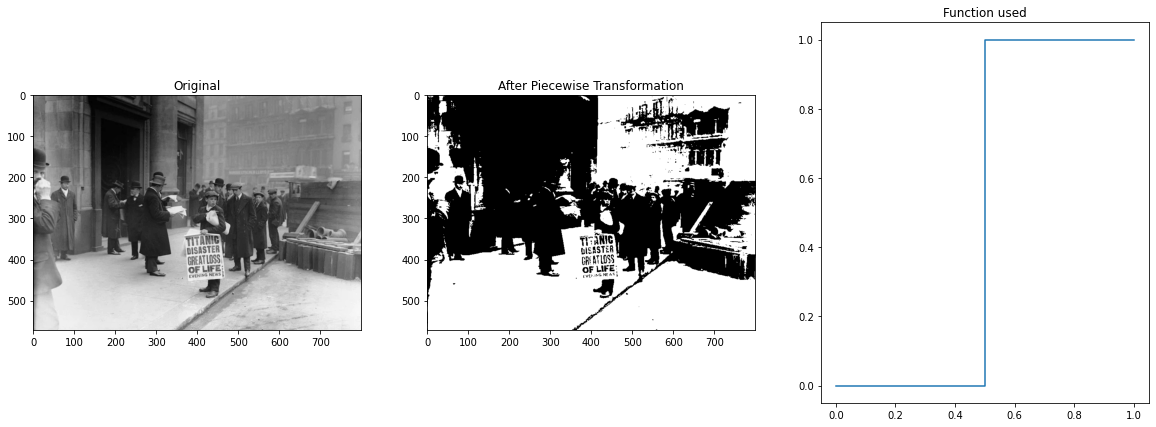

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/titanic.jpg'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

# Transformation used
# transformation = [[3/4, 0, 0, 0,4], [2, -0.5, 0.4, 0.6], [3/4, 1/4, 0.6, 1]]
transformation = [[0, 0, 0, 0.5], [0, 1, 0.5, 1]]

f, axarr = plt.subplots(1,3,figsize=(20, 7))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(piecewiseLinTransform(img, transformation), cmap='gray')
axarr[1].title.set_text('After Piecewise Transformation')
plotPLT(axarr[2], transformation)
axarr[2].title.set_text('Function used')
plt.show()

**In the first case the text is seen to become completely black. This is because it's mapping the pixel values that lie in [0.8, 1] ( Normalized from [0, 255] to [0, 1] ) to 0 i.e black.**

**In the second part the step function is used. So when we move from 0 to 255 the pixel values drop increases, hence the white value dominates the image.**

### **8.1**

In [ ]:
# Applies Gamma Transform on img with given gamma value and c = 1
def gammaTransform(img, gamma):
  return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

### **8.2**
**Gamma value used = 0.5**

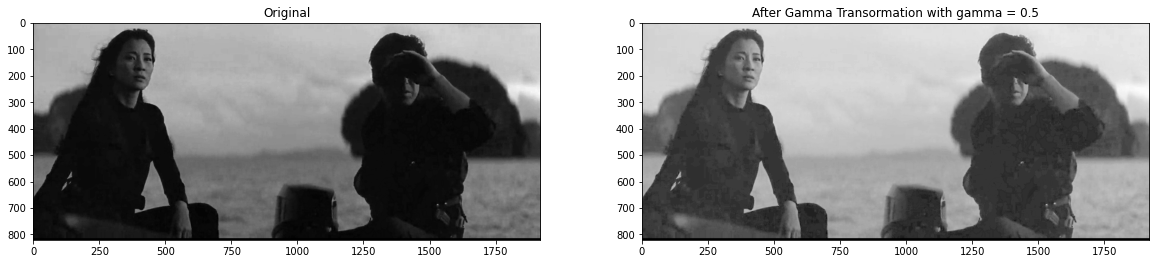

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/stealth.png'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

gamma = 0.5

f, axarr = plt.subplots(1,2,figsize=(20, 8))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(gammaTransform(img, gamma), cmap='gray')
axarr[1].title.set_text('After Gamma Transormation with gamma = ' + str(gamma))
plt.show()

### **8.3**
**Value of gamma used = 2.8**

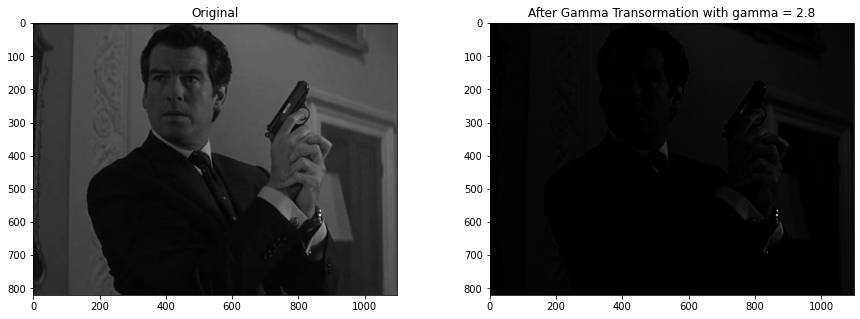

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/unstealth.png'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

gamma = 2.8

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(gammaTransform(img, gamma), cmap='gray')
axarr[1].title.set_text('After Gamma Transormation with gamma = ' + str(gamma))
plt.show()

### **8.4**
**Gamma value used = 0.1**

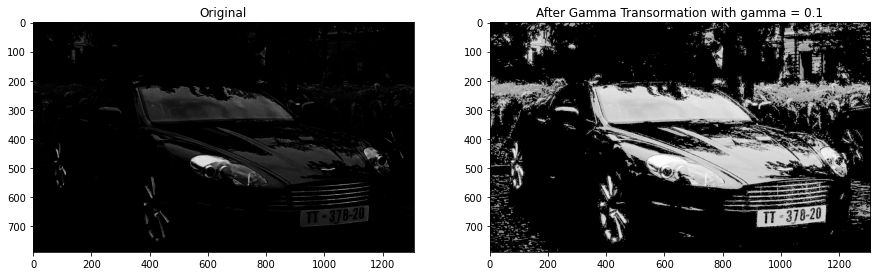

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/aston_invisible.jpg'), cv2.COLOR_BGR2RGB)
img = (img.sum(axis=2) / 3).astype('int')

gamma = 0.1

f, axarr = plt.subplots(1,2,figsize=(15, 5))
axarr[0].imshow(img, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(gammaTransform(img, gamma), cmap='gray')
axarr[1].title.set_text('After Gamma Transormation with gamma = ' + str(gamma))
plt.show()

### **9**

**Images Given**

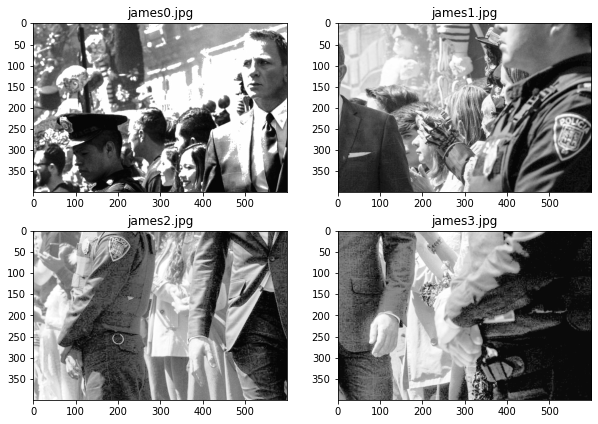

In [1174]:
james = [ [] for i in range(4) ]

# Getting the 4 images and storing in array named james
for i in range(4):
  james[i] = cv2.cvtColor(cv2.imread('./../images/james' + str(i + 1) + '.jpg'), cv2.COLOR_BGR2RGB)
  james[i] = (james[i].sum(axis=2) / 3).astype('int')
  james[i] = james[i].astype('uint8')

# Plotting the 4 images
f, axarr = plt.subplots(2,2,figsize=(10,7))
for i in range(2):
  for j in range(2):
    axarr[i][j].imshow(james[i*2 + j], cmap='gray')
    axarr[i][j].title.set_text('james' + str(i*2 + j) + '.jpg')
plt.show()

**Plotting histogram of images**

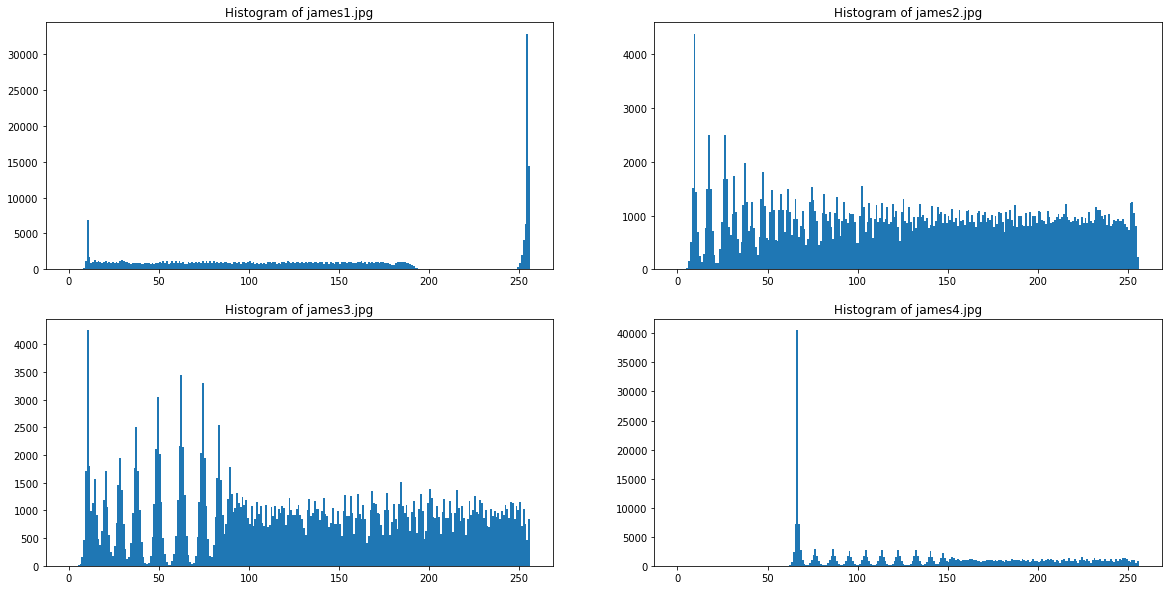

In [1175]:
# Plotting histogram of images

f, axarr = plt.subplots(2,2,figsize=(20,10))
for i in range(2):
  for j in range(2):
    hist = cv2.calcHist([james[2 * i + j]],[0],None,[256],[0,256])
    axarr[i][j].hist(james[2 * i + j].ravel(),256,[0,256])
    axarr[i][j].title.set_text('Histogram of james' + str(i * 2 + j + 1) + '.jpg')
plt.show()

In [1204]:
# We will store new images here
james2 = [ [] for i in range(6) ]

In [1205]:
james2[1] = gammaTransform(james[1], 1.6)

In [1206]:
james2[3] = gammaTransform(james[3], 5.05)
james2[3] = linContrastStretching(james2[3], 0, 255)

In [1207]:
james2[0] = piecewiseLinTransform(james[0], [[1, 0, 0, 250/255], [0.95, 0, 250/255, 1]])
james2[0] = gammaTransform(james[0], 1.05)

In [1208]:
james2[2] = gammaTransform(james[2], 2.15)
james2[2] = linContrastStretching(james2[2], 0, 255)

**Histogram of images after modifications**

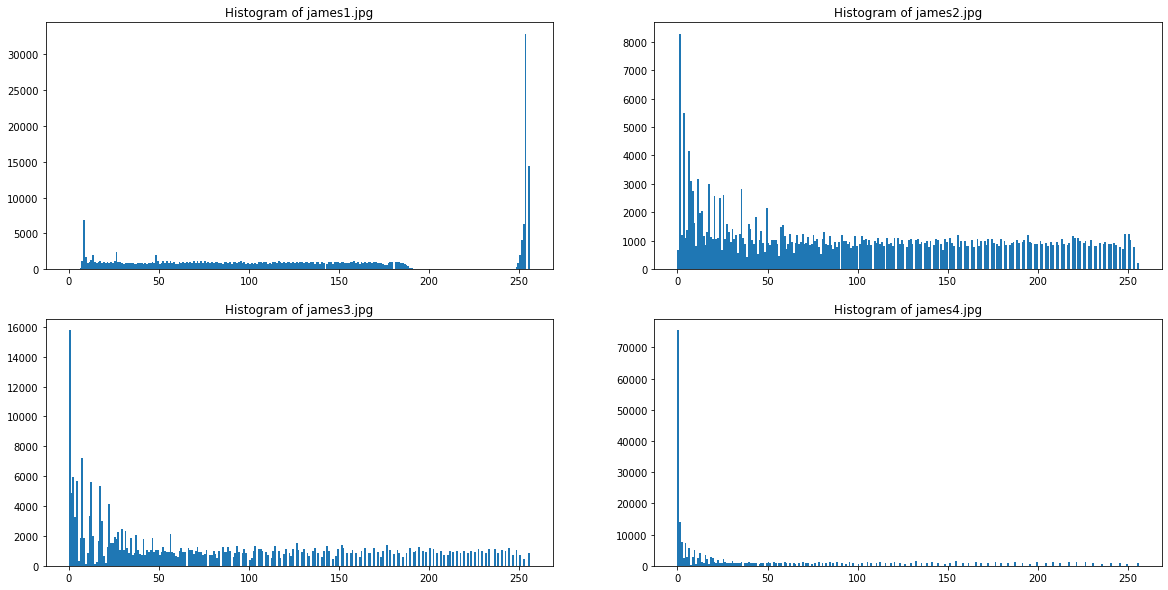

In [1209]:
# Plotting histogram of images

f, axarr = plt.subplots(2,2,figsize=(20,10))
for i in range(2):
  for j in range(2):
    hist = cv2.calcHist([james2[2 * i + j]],[0],None,[256],[0,256])
    axarr[i][j].hist(james2[2 * i + j].ravel(),256,[0,256])
    axarr[i][j].title.set_text('Histogram of james' + str(i * 2 + j + 1) + '.jpg')
plt.show()

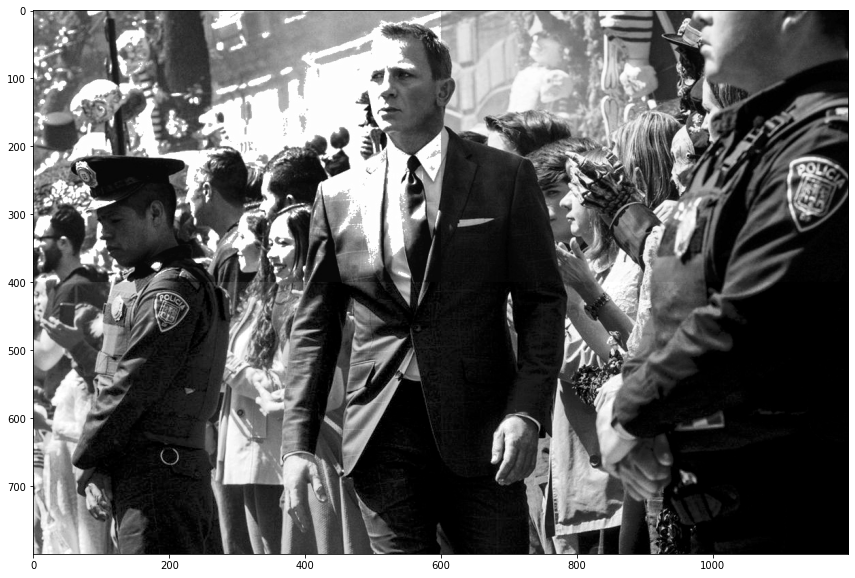

In [1210]:
# Concatenating the 4 images
james2[4] = np.concatenate((james2[0], james2[1]), 1)
james2[5] = np.concatenate((james2[2], james2[3]), 1)
james2[4] = np.concatenate((james2[4], james2[5]), 0)

# Plotting the result image
plt.figure(figsize=(15, 10))
plt.imshow(james2[4], cmap='gray')